In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1.

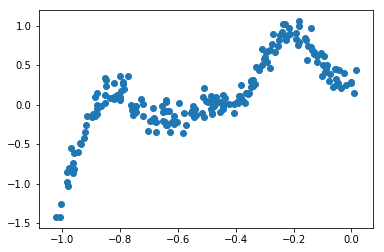

In [17]:
plt.scatter(x, y)

In [18]:
xx = np.linspace(min(x), max(x), num=200)

In [19]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [20]:
import mylibrary.nnlib as tnn

In [21]:
class Relu_linear_backprop(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta):
        return output_delta
#         return ((self.x >= 0).astype(float)) * output_delta

In [22]:
'''
Vanishing gradient on the zeros region of relu is solved using the LinearOnly Backpropagation.
'''
#Lets GO with Multilaye Perceptron with LinearB

'\nVanishing gradient on the zeros region of relu is solved using the LinearOnly Backpropagation.\n'

In [72]:
hidden_size = 4

optimizer = tnn.Adam(learning_rate=0.001)
la1a = tnn.NonLinearLayer(1, hidden_size, activation=Relu_linear_backprop(), optimizer=optimizer)
la2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

In [73]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = la1a.forward(x_data)
    a2 = la2a.forward(a1)
    loss = tnn.MseLoss.loss(a2, y_data)
    dy = tnn.MseLoss.del_loss(a2, y_data)
    
    da1 = la2a.backward(dy)
    dx = la1a.backward(da1)
    
    la1a.update()
    la2a.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(a1.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
            
        print("Weight 1", '\n', la1a.weights)
        print("Weight 2", '\n', la2a.weights)
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.3247943602623167
Weight 1 
 [[-1.50980807  1.20130363 -0.03525399  1.89263913]]
Weight 2 
 [[ 0.69144556]
 [ 0.04722092]
 [-0.21677362]
 [ 0.0633889 ]]


_______________________
epoch 100
Loss 0.21632032214637484
Weight 1 
 [[-1.42125705  1.2942136  -0.13389364  1.98683244]]
Weight 2 
 [[ 0.60225953]
 [ 0.05334212]
 [-0.3333819 ]
 [ 0.07595125]]


_______________________
epoch 200
Loss 0.18132358533110923
Weight 1 
 [[-1.36016353  1.36340249 -0.22343222  2.05692207]]
Weight 2 
 [[ 0.53718724]
 [ 0.0533423 ]
 [-0.43425964]
 [ 0.07595198]]


_______________________
epoch 300
Loss 0.15972834498876232
Weight 1 
 [[-1.31350854  1.42072177 -0.30732036  2.11483765]]
Weight 2 
 [[ 0.48303805]
 [ 0.0533423 ]
 [-0.52040629]
 [ 0.07595198]]


_______________________
epoch 400
Loss 0.1370122912256322
Weight 1 
 [[-1.2718554   1.4764543  -0.39717667  2.17108348]]
Weight 2 
 [[ 0.43138834]
 [ 0.0533423 ]
 [-0.62626494]
 [ 0.07595198]]


_______________________


_______________________
epoch 4200
Loss 0.04828120014796736
Weight 1 
 [[-1.07957369  2.97517542 -1.48994624  1.57042693]]
Weight 2 
 [[-0.00590233]
 [ 0.43000121]
 [-0.95959607]
 [-0.9945539 ]]


_______________________
epoch 4300
Loss 0.04819105527260241
Weight 1 
 [[-1.07974375  2.99274958 -1.50677214  1.52075634]]
Weight 2 
 [[-0.01391114]
 [ 0.42407847]
 [-0.93776605]
 [-0.9945539 ]]


_______________________
epoch 4400
Loss 0.048101797591842174
Weight 1 
 [[-1.08007884  3.01078263 -1.52388406  1.46964529]]
Weight 2 
 [[-0.02225795]
 [ 0.41801705]
 [-0.91606307]
 [-0.9945539 ]]


_______________________
epoch 4500
Loss 0.0480125977720703
Weight 1 
 [[-1.08059867  3.02924676 -1.5412522   1.41717068]]
Weight 2 
 [[-0.0309447 ]
 [ 0.41183218]
 [-0.89451952]
 [-0.9945539 ]]


_______________________
epoch 4600
Loss 0.04792372110181645
Weight 1 
 [[-1.08132374  3.04811144 -1.55884548  1.36341745]]
Weight 2 
 [[-0.03997243]
 [ 0.40552691]
 [-0.87317228]
 [-0.9945539 ]]


_______________

TclError: this isn't a Tk application

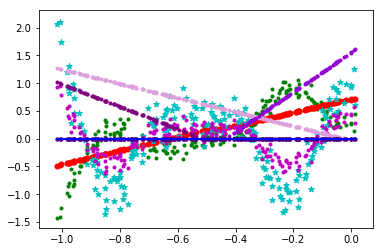

In [74]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
colors = ['plum', 'darkviolet', 'purple', 'indigo']
for i, out in enumerate(a1.T):
    plt.scatter(x, out, marker='.', c=colors[i], lw=1)

In [75]:
# here it is.. the error problem is partially solved; the scaling of dx is proper: but the learning is not good
# now solving the error : dx till error decrreases to threshold
# Not good learning NOT_GOOD

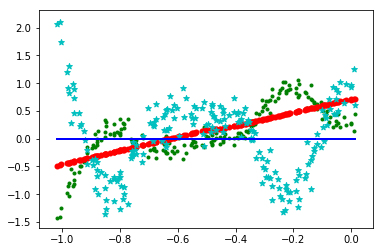

In [77]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
# plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)
# colors = ['plum', 'darkviolet', 'purple', 'indigo']
# for i, out in enumerate(a1.T):
#     plt.scatter(x, out, marker='.', c=colors[i], lw=1)

In [78]:
# Relu with different gradient for zero region

In [81]:
class ReluUG(tnn.Layer):
    def __init__(self):
        tnn.layerList.append(self)
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, output_delta):
#         return output_delta
        return np.where(self.x >= 0, output_delta, self.x)
#         return ((self.x >= 0).astype(float)) * output_delta

In [83]:
optimizer = tnn.SGD()
la1 = tnn.NonLinearLayer(1, 1, activation=ReluUG(), optimizer=optimizer)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(1000):
    a1 = la1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = la1.backward(dy)
    
    la1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', la1.weights)
        print("Biases 1", '\n', la1.bias)
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.11388355447977737
Weight 1 
 [[-0.0592412]]
Biases 1 
 [0.00099662]

_______________________
epoch 10
Loss 0.11261891847088457
Weight 1 
 [[-0.05385384]]
Biases 1 
 [0.01085066]

_______________________
epoch 20
Loss 0.11144752375923758
Weight 1 
 [[-0.04817447]]
Biases 1 
 [0.02002619]

_______________________
epoch 30
Loss 0.11035500032152606
Weight 1 
 [[-0.04224429]]
Biases 1 
 [0.0286011]

_______________________
epoch 40
Loss 0.10932604576116307
Weight 1 
 [[-0.03609952]]
Biases 1 
 [0.03664397]

_______________________
epoch 50
Loss 0.1083487697290977
Weight 1 
 [[-0.02977199]]
Biases 1 
 [0.04421522]

_______________________
epoch 60
Loss 0.10741392630381653
Weight 1 
 [[-0.02328971]]
Biases 1 
 [0.05136802]

_______________________
epoch 70
Loss 0.10651431915676651
Weight 1 
 [[-0.01667727]]
Biases 1 
 [0.05814924]

_______________________
epoch 80
Loss 0.10564434060930243
Weight 1 
 [[-0.00995628]]
Biases 1 
 [0.06460013]

______________


_______________________
epoch 760
Loss 0.07454189815497564
Weight 1 
 [[0.34588902]]
Biases 1 
 [0.33152704]

_______________________
epoch 770
Loss 0.07438277750387674
Weight 1 
 [[0.34893139]]
Biases 1 
 [0.33409743]

_______________________
epoch 780
Loss 0.07422839679245839
Weight 1 
 [[0.351809]]
Biases 1 
 [0.33676092]

_______________________
epoch 790
Loss 0.0740788838462848
Weight 1 
 [[0.35460914]]
Biases 1 
 [0.33941988]

_______________________
epoch 800
Loss 0.07393387228156303
Weight 1 
 [[0.35737103]]
Biases 1 
 [0.34203391]

_______________________
epoch 810
Loss 0.07379288167867232
Weight 1 
 [[0.360168]]
Biases 1 
 [0.34453061]

_______________________
epoch 820
Loss 0.07365537231608613
Weight 1 
 [[0.36299341]]
Biases 1 
 [0.34692274]

_______________________
epoch 830
Loss 0.07352091860987525
Weight 1 
 [[0.36584143]]
Biases 1 
 [0.34922151]

_______________________
epoch 840
Loss 0.0733891839914528
Weight 1 
 [[0.36870696]]
Biases 1 
 [0.35143682]

_______________

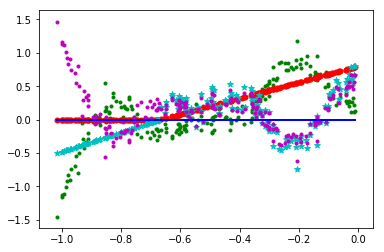

In [180]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

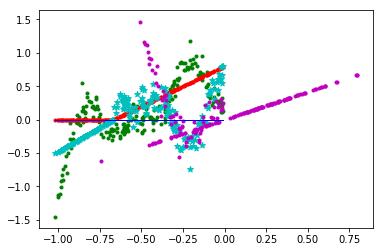

In [181]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')
# here is linear relationship between dx and dy

In [184]:
hidden_size = 4

optimizer = tnn.Adam()
la1a = tnn.NonLinearLayer(1, hidden_size, activation=ReluUG(), optimizer=optimizer)
la2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = la1a.forward(x_data)
    a2 = la2a.forward(a1)
    loss = tnn.MseLoss.loss(a2, y_data)
    dy = tnn.MseLoss.del_loss(a2, y_data)
    
    da1 = la2a.backward(dy)
    dx = la1a.backward(da1)
    
    la1a.update()
    la2a.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=3, label='x,a2')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(a1.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
            
        print("Weight 1", '\n', la1a.weights)
        print("Weight 2", '\n', la2a.weights)
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.11896228797875921
Weight 1 
 [[-1.75289988 -0.47702947 -1.30216452 -2.17022119]]
Weight 2 
 [[ 0.05110031]
 [ 1.08464788]
 [-0.29842941]
 [-0.26660781]]


_______________________
epoch 10
Loss 0.07752672114047977
Weight 1 
 [[-1.76034235 -0.49547863 -1.28039275 -2.1480006 ]]
Weight 2 
 [[ 0.07152415]
 [ 1.10798026]
 [-0.28076101]
 [-0.24832805]]


_______________________
epoch 20
Loss 0.05792856595343752
Weight 1 
 [[-1.69515927 -0.43707015 -1.33635331 -2.20340099]]
Weight 2 
 [[ 0.01651508]
 [ 1.05916571]
 [-0.34143081]
 [-0.3078898 ]]


_______________________
epoch 30
Loss 0.04695465770908202
Weight 1 
 [[-1.66895197 -0.4165914  -1.35590361 -2.22201629]]
Weight 2 
 [[ 0.00556978]
 [ 1.06995535]
 [-0.3728463 ]
 [-0.33496139]]


_______________________
epoch 40
Loss 0.04263647059388655
Weight 1 
 [[-1.65780134 -0.3874789  -1.39388578 -2.25836843]]
Weight 2 
 [[-0.01693675]
 [ 1.06523546]
 [-0.41280914]
 [-0.37081117]]


_______________________
ep



_______________________
epoch 430
Loss 0.040108516351852044
Weight 1 
 [[-1.75648869 -0.54224784 -1.2405649  -1.89696082]]
Weight 2 
 [[ 0.12148305]
 [ 1.16873649]
 [-0.80241501]
 [-0.53574045]]


_______________________
epoch 440
Loss 0.040049409067920115
Weight 1 
 [[-1.76597009 -0.54796755 -1.23925506 -1.88300028]]
Weight 2 
 [[ 0.12653984]
 [ 1.17290989]
 [-0.81573147]
 [-0.54218457]]


_______________________
epoch 450
Loss 0.039991283094866194
Weight 1 
 [[-1.77577463 -0.55366887 -1.23845231 -1.86905078]]
Weight 2 
 [[ 0.13160133]
 [ 1.177138  ]
 [-0.82920552]
 [-0.54879805]]


_______________________
epoch 460
Loss 0.0399321701662766
Weight 1 
 [[-1.78597503 -0.55939148 -1.23800229 -1.85501773]]
Weight 2 
 [[ 0.13670478]
 [ 1.18145586]
 [-0.84279232]
 [-0.5555434 ]]


_______________________
epoch 470
Loss 0.0398656876815995
Weight 1 
 [[-1.79655027 -0.5651236  -1.23802194 -1.84069201]]
Weight 2 
 [[ 0.14183203]
 [ 1.18580839]
 [-0.85648309]
 [-0.56241998]]


_________________

Weight 1 
 [[-2.40679037 -0.77196047 -1.39253119 -1.30991606]]
Weight 2 
 [[ 0.34667736]
 [ 1.37662708]
 [-1.43106924]
 [-0.87059555]]


_______________________
epoch 860
Loss 0.03767671162686278
Weight 1 
 [[-2.42492505 -0.77648709 -1.39768121 -1.29820491]]
Weight 2 
 [[ 0.35163298]
 [ 1.38125321]
 [-1.44683992]
 [-0.87851467]]


_______________________
epoch 870
Loss 0.037639762880335964
Weight 1 
 [[-2.44299965 -0.78094842 -1.40291306 -1.28658262]]
Weight 2 
 [[ 0.3565396 ]
 [ 1.38578793]
 [-1.46256924]
 [-0.88639168]]


_______________________
epoch 880
Loss 0.03760066501868307
Weight 1 
 [[-2.46110097 -0.78537527 -1.40817548 -1.27498053]]
Weight 2 
 [[ 0.36142603]
 [ 1.39035273]
 [-1.47826847]
 [-0.89422773]]


_______________________
epoch 890
Loss 0.03756511482461653
Weight 1 
 [[-2.47935911 -0.78980252 -1.4133365  -1.26342512]]
Weight 2 
 [[ 0.36633184]
 [ 1.39497221]
 [-1.49389465]
 [-0.90200376]]


_______________________
epoch 900
Loss 0.037533996413914694
Weight 1 
 [[-2.49

Weight 1 
 [[-3.01339694 -0.90748879 -1.50349793 -0.9461545 ]]
Weight 2 
 [[ 0.50447131]
 [ 1.52359014]
 [-2.06028746]
 [-1.14716706]]


_______________________
epoch 1280
Loss 0.036695656413079265
Weight 1 
 [[-3.02014702 -0.90907395 -1.50245021 -0.94046032]]
Weight 2 
 [[ 0.50642198]
 [ 1.52538352]
 [-2.07426132]
 [-1.1524217 ]]


_______________________
epoch 1290
Loss 0.03669305405440301
Weight 1 
 [[-3.02728219 -0.91079123 -1.50022279 -0.93450652]]
Weight 2 
 [[ 0.50852561]
 [ 1.52737067]
 [-2.08804427]
 [-1.15758217]]


_______________________
epoch 1300
Loss 0.036676343503634384
Weight 1 
 [[-3.03406258 -0.9124431  -1.49791646 -0.9283851 ]]
Weight 2 
 [[ 0.51055508]
 [ 1.5292234 ]
 [-2.10173415]
 [-1.16267392]]


_______________________
epoch 1310
Loss 0.036659262641506166
Weight 1 
 [[-3.03939431 -0.91376834 -1.49653547 -0.92334522]]
Weight 2 
 [[ 0.51218837]
 [ 1.53061284]
 [-2.1155379 ]
 [-1.16779581]]


_______________________
epoch 1320
Loss 0.03665875320012422
Weight 1 
 [

Weight 1 
 [[-3.16616047 -0.95617034 -1.39236984 -0.7510421 ]]
Weight 2 
 [[ 0.56353815]
 [ 1.57816062]
 [-2.58345233]
 [-1.33259657]]


_______________________
epoch 1700
Loss 0.03645509722414376
Weight 1 
 [[-3.16792599 -0.95697323 -1.38900265 -0.74752041]]
Weight 2 
 [[ 0.56448051]
 [ 1.57895289]
 [-2.5945662 ]
 [-1.33635957]]


_______________________
epoch 1710
Loss 0.036449293106128856
Weight 1 
 [[-3.16973931 -0.95780599 -1.38593619 -0.74363371]]
Weight 2 
 [[ 0.56545061]
 [ 1.57990334]
 [-2.60569906]
 [-1.34010105]]


_______________________
epoch 1720
Loss 0.03644075251628862
Weight 1 
 [[-3.17051328 -0.95817258 -1.38368491 -0.74087449]]
Weight 2 
 [[ 0.56588187]
 [ 1.58022975]
 [-2.61700144]
 [-1.34390635]]


_______________________
epoch 1730
Loss 0.036444112187162696
Weight 1 
 [[-3.17263016 -0.95914658 -1.37992704 -0.73681401]]
Weight 2 
 [[ 0.56703253]
 [ 1.5813512 ]
 [-2.62790612]
 [-1.34755966]]


_______________________
epoch 1740
Loss 0.03643297147402937
Weight 1 
 [[



_______________________
epoch 2110
Loss 0.03639399710857736
Weight 1 
 [[-3.2131304  -0.98164845 -1.27941977 -0.63072372]]
Weight 2 
 [[ 0.59280073]
 [ 1.60439162]
 [-3.01592698]
 [-1.47542409]]


_______________________
epoch 2120
Loss 0.03637249531454441
Weight 1 
 [[-3.21341933 -0.98185357 -1.27728778 -0.62893726]]
Weight 2 
 [[ 0.59303652]
 [ 1.6044923 ]
 [-3.02549936]
 [-1.47854838]]


_______________________
epoch 2130
Loss 0.036359513663467236
Weight 1 
 [[-3.21327707 -0.98178296 -1.27543766 -0.62753942]]
Weight 2 
 [[ 0.59295168]
 [ 1.60434616]
 [-3.03529882]
 [-1.48174876]]


_______________________
epoch 2140
Loss 0.03638918559829621
Weight 1 
 [[-3.21479393 -0.98277725 -1.272364   -0.62432617]]
Weight 2 
 [[ 0.59405111]
 [ 1.60547445]
 [-3.04441799]
 [-1.48472484]]


_______________________
epoch 2150
Loss 0.03637186586977561
Weight 1 
 [[-3.21573916 -0.98340937 -1.26969123 -0.62147086]]
Weight 2 
 [[ 0.59476002]
 [ 1.60607258]
 [-3.0536046 ]
 [-1.48772387]]


____________

Weight 1 
 [[-3.23294186 -0.99632029 -1.1856719  -0.54991267]]
Weight 2 
 [[ 0.60876072]
 [ 1.61764491]
 [-3.39126307]
 [-1.59757004]]


_______________________
epoch 2540
Loss 0.03634911534171206
Weight 1 
 [[-3.23355019 -0.99679384 -1.18330783 -0.54796815]]
Weight 2 
 [[ 0.60927089]
 [ 1.61809851]
 [-3.39946529]
 [-1.60027234]]


_______________________
epoch 2550
Loss 0.03633383459027332
Weight 1 
 [[-3.23392475 -0.99709783 -1.18126404 -0.54629661]]
Weight 2 
 [[ 0.60959104]
 [ 1.61836928]
 [-3.40781419]
 [-1.60301174]]


_______________________
epoch 2560
Loss 0.036330213104687176
Weight 1 
 [[-3.23362864 -0.99690225 -1.17990015 -0.545573  ]]
Weight 2 
 [[ 0.60937534]
 [ 1.61805426]
 [-3.41644635]
 [-1.60584395]]


_______________________
epoch 2570
Loss 0.03632299847393591
Weight 1 
 [[-3.23415877 -0.99733007 -1.17761161 -0.54365235]]
Weight 2 
 [[ 0.60983706]
 [ 1.61843615]
 [-3.42466022]
 [-1.60853061]]


_______________________
epoch 2580
Loss 0.036324292986281224
Weight 1 
 [[

Weight 1 
 [[-3.24445724 -1.00655689 -1.10851842 -0.49186511]]
Weight 2 
 [[ 0.61945245]
 [ 1.62583275]
 [-3.726966  ]
 [-1.70897232]]


_______________________
epoch 2960
Loss 0.03631005967458863
Weight 1 
 [[-3.24420114 -1.00635696 -1.10750022 -0.49137149]]
Weight 2 
 [[ 0.61923472]
 [ 1.62556528]
 [-3.73479062]
 [-1.71162269]]


_______________________
epoch 2970
Loss 0.036329746956207866
Weight 1 
 [[-3.24538355 -1.00739709 -1.10463637 -0.48918248]]
Weight 2 
 [[ 0.6203226 ]
 [ 1.62652476]
 [-3.74171388]
 [-1.71394108]]


_______________________
epoch 2980
Loss 0.0363087746467447
Weight 1 
 [[-3.24512191 -1.00721443 -1.10359079 -0.48875538]]
Weight 2 
 [[ 0.62011991]
 [ 1.62625253]
 [-3.74951333]
 [-1.71656645]]


_______________________
epoch 2990
Loss 0.036308158248706555
Weight 1 
 [[-3.24546034 -1.0075278  -1.10186247 -0.48712923]]
Weight 2 
 [[ 0.62044771]
 [ 1.62649881]
 [-3.75693982]
 [-1.71906363]]


_______________________
epoch 3000
Loss 0.03631633896475505
Weight 1 
 [[-



_______________________
epoch 3380
Loss 0.03629978160814202
Weight 1 
 [[-3.25196559 -1.01430946 -1.04304951 -0.44882393]]
Weight 2 
 [[ 0.62727534]
 [ 1.63093467]
 [-4.03838934]
 [-1.81697037]]


_______________________
epoch 3390
Loss 0.03629178035174471
Weight 1 
 [[-3.25236864 -1.01469486 -1.04138644 -0.44769792]]
Weight 2 
 [[ 0.62765783]
 [ 1.63131947]
 [-4.04521504]
 [-1.81941641]]


_______________________
epoch 3400
Loss 0.03629288004407413
Weight 1 
 [[-3.25248474 -1.01480969 -1.04003999 -0.44697738]]
Weight 2 
 [[ 0.627781  ]
 [ 1.63138324]
 [-4.05214954]
 [-1.82192741]]


_______________________
epoch 3410
Loss 0.03629627031889286
Weight 1 
 [[-3.25318698 -1.01546331 -1.03822148 -0.44528467]]
Weight 2 
 [[ 0.6284514 ]
 [ 1.63200355]
 [-4.0587088 ]
 [-1.8242785 ]]


_______________________
epoch 3420
Loss 0.03629703151964361
Weight 1 
 [[-3.25313541 -1.01544451 -1.03704839 -0.44454418]]
Weight 2 
 [[ 0.62842642]
 [ 1.63192494]
 [-4.06575189]
 [-1.8267965 ]]


_____________



_______________________
epoch 3800
Loss 0.03628642497803061
Weight 1 
 [[-3.25747833 -1.02055346 -0.98761668 -0.41525776]]
Weight 2 
 [[ 0.63342584]
 [ 1.63463409]
 [-4.31719115]
 [-1.92028363]]


_______________________
epoch 3810
Loss 0.03628845137227384
Weight 1 
 [[-3.25758481 -1.02068051 -0.98652508 -0.41456219]]
Weight 2 
 [[ 0.63355365]
 [ 1.63468748]
 [-4.32349259]
 [-1.92273571]]


_______________________
epoch 3820
Loss 0.03628857194263479
Weight 1 
 [[-3.25773797 -1.02085247 -0.9853484  -0.41383971]]
Weight 2 
 [[ 0.6337236 ]
 [ 1.63479931]
 [-4.32982178]
 [-1.92520236]]


_______________________
epoch 3830
Loss 0.036307222569089054
Weight 1 
 [[-3.2581209  -1.02123719 -0.98390975 -0.41271648]]
Weight 2 
 [[ 0.63411101]
 [ 1.63513109]
 [-4.33595506]
 [-1.92759818]]


_______________________
epoch 3840
Loss 0.036289381247899835
Weight 1 
 [[-3.25779197 -1.02095945 -0.9832237  -0.41263449]]
Weight 2 
 [[ 0.63382102]
 [ 1.63479024]
 [-4.34260319]
 [-1.93020262]]


___________



_______________________
epoch 4230
Loss 0.03628301553764977
Weight 1 
 [[-3.26151413 -1.02556719 -0.94023149 -0.38911088]]
Weight 2 
 [[ 0.63828523]
 [ 1.63701692]
 [-4.57934066]
 [-2.0267003 ]]


_______________________
epoch 4240
Loss 0.03627815796634692
Weight 1 
 [[-3.26173158 -1.02580213 -0.93901778 -0.38832973]]
Weight 2 
 [[ 0.63852208]
 [ 1.63716863]
 [-4.58499924]
 [-2.02909765]]


_______________________
epoch 4250
Loss 0.0362987534395477
Weight 1 
 [[-3.26203071 -1.02611014 -0.93762057 -0.38766995]]
Weight 2 
 [[ 0.63882925]
 [ 1.63742193]
 [-4.59067154]
 [-2.03152014]]


_______________________
epoch 4260
Loss 0.03630675927702347
Weight 1 
 [[-3.26137357 -1.02550234 -0.93730805 -0.38794548]]
Weight 2 
 [[ 0.63821013]
 [ 1.63676155]
 [-4.59705197]
 [-2.03426916]]


_______________________
epoch 4270
Loss 0.03630545353582746
Weight 1 
 [[-3.26214393 -1.02626625 -0.93540004 -0.38656997]]
Weight 2 
 [[ 0.63897631]
 [ 1.63747914]
 [-4.60232137]
 [-2.03651902]]


______________



_______________________
epoch 4650
Loss 0.03628442265867146
Weight 1 
 [[-3.26488787 -1.03005024 -0.89837166 -0.36839859]]
Weight 2 
 [[ 0.64256755]
 [ 1.63882361]
 [-4.8166238 ]
 [-2.13210187]]


_______________________
epoch 4660
Loss 0.03630346387558343
Weight 1 
 [[-3.26406908 -1.02931934 -0.89840344 -0.36914588]]
Weight 2 
 [[ 0.64181699]
 [ 1.63795968]
 [-4.82262137]
 [-2.13489667]]


_______________________
epoch 4670
Loss 0.036276622439333016
Weight 1 
 [[-3.26440255 -1.02969144 -0.89744073 -0.36825776]]
Weight 2 
 [[ 0.64218345]
 [ 1.63822757]
 [-4.82765681]
 [-2.13724309]]


_______________________
epoch 4680
Loss 0.03627801767612249
Weight 1 
 [[-3.26468001 -1.02999216 -0.89631233 -0.36772111]]
Weight 2 
 [[ 0.642482  ]
 [ 1.63845736]
 [-4.83281579]
 [-2.13970783]]


_______________________
epoch 4690
Loss 0.036273969319313606
Weight 1 
 [[-3.26474938 -1.03007523 -0.89546113 -0.36745205]]
Weight 2 
 [[ 0.64256165]
 [ 1.6385116 ]
 [-4.83822696]
 [-2.1423402 ]]


___________

Weight 1 
 [[-3.26689512 -1.03304289 -0.86356082 -0.3537162 ]]
Weight 2 
 [[ 0.64538399]
 [ 1.63951438]
 [-5.03732216]
 [-2.24221618]]


_______________________
epoch 5080
Loss 0.03627259794568347
Weight 1 
 [[-3.26730893 -1.03347993 -0.86231785 -0.35311074]]
Weight 2 
 [[ 0.6458228 ]
 [ 1.6398617 ]
 [-5.04205804]
 [-2.24467029]]


_______________________
epoch 5090
Loss 0.03630153039725269
Weight 1 
 [[-3.26693608 -1.0331317  -0.86206743 -0.35317435]]
Weight 2 
 [[ 0.6454707 ]
 [ 1.63947462]
 [-5.04756326]
 [-2.24758022]]


_______________________
epoch 5100
Loss 0.036269893211081185
Weight 1 
 [[-3.26732861 -1.03354951 -0.86088015 -0.35228163]]
Weight 2 
 [[ 0.64587845]
 [ 1.63981552]
 [-5.05228595]
 [-2.24999566]]


_______________________
epoch 5110
Loss 0.0362917747981331
Weight 1 
 [[-3.26699165 -1.03323961 -0.86046673 -0.35247688]]
Weight 2 
 [[ 0.64556407]
 [ 1.63944939]
 [-5.05762461]
 [-2.2528311 ]]


_______________________
epoch 5120
Loss 0.036271553284684926
Weight 1 
 [[-

Weight 1 
 [[-3.26927015 -1.03654045 -0.83076913 -0.3396089 ]]
Weight 2 
 [[ 0.64865745]
 [ 1.64047251]
 [-5.24082782]
 [-2.35466126]]


_______________________
epoch 5500
Loss 0.03630701120560595
Weight 1 
 [[-3.26962747 -1.03695876 -0.8293332  -0.33895418]]
Weight 2 
 [[ 0.6490726 ]
 [ 1.64071596]
 [-5.24483326]
 [-2.35686661]]


_______________________
epoch 5510
Loss 0.03627574272544438
Weight 1 
 [[-3.26869275 -1.03609346 -0.82943549 -0.33986669]]
Weight 2 
 [[ 0.64818028]
 [ 1.63975997]
 [-5.25011291]
 [-2.35988949]]


_______________________
epoch 5520
Loss 0.03627833513686563
Weight 1 
 [[-3.26821792 -1.03565928 -0.82912771 -0.33996501]]
Weight 2 
 [[ 0.64773789]
 [ 1.63924713]
 [-5.25507683]
 [-2.36280188]]


_______________________
epoch 5530
Loss 0.036268992953632874
Weight 1 
 [[-3.26874771 -1.03620445 -0.82803697 -0.33922432]]
Weight 2 
 [[ 0.64827914]
 [ 1.63974743]
 [-5.25922342]
 [-2.36525785]]


_______________________
epoch 5540
Loss 0.03627357298491517
Weight 1 
 [[-



_______________________
epoch 5910
Loss 0.03628877884931133
Weight 1 
 [[-3.27120962 -1.03955694 -0.8018668  -0.32960108]]
Weight 2 
 [[ 0.65147091]
 [ 1.64107465]
 [-5.4306281 ]
 [-2.47150795]]


_______________________
epoch 5920
Loss 0.036291262413166346
Weight 1 
 [[-3.27129785 -1.03966924 -0.80117519 -0.32944866]]
Weight 2 
 [[ 0.65157594]
 [ 1.64114291]
 [-5.43497318]
 [-2.47433473]]


_______________________
epoch 5930
Loss 0.036287672780369574
Weight 1 
 [[-3.27129153 -1.03968946 -0.80056916 -0.32917286]]
Weight 2 
 [[ 0.65159342]
 [ 1.6410984 ]
 [-5.43933507]
 [-2.47716997]]


_______________________
epoch 5940
Loss 0.036290476676857523
Weight 1 
 [[-3.27136721 -1.03978936 -0.79988089 -0.32904384]]
Weight 2 
 [[ 0.6516862 ]
 [ 1.6411538 ]
 [-5.4436788 ]
 [-2.48000919]]


_______________________
epoch 5950
Loss 0.036288577130121596
Weight 1 
 [[-3.27136499 -1.03981302 -0.79927612 -0.32874059]]
Weight 2 
 [[ 0.65170703]
 [ 1.64111306]
 [-5.44802052]
 [-2.48283828]]


_________



_______________________
epoch 6340
Loss 0.03627548638477505
Weight 1 
 [[-3.27215449 -1.04156972 -0.77475031 -0.32097119]]
Weight 2 
 [[ 0.65326199]
 [ 1.64077261]
 [-5.61167934]
 [-2.59456506]]


_______________________
epoch 6350
Loss 0.03628921675779825
Weight 1 
 [[-3.27220251 -1.04164412 -0.77410409 -0.32076679]]
Weight 2 
 [[ 0.65332936]
 [ 1.64079644]
 [-5.61574548]
 [-2.59744306]]


_______________________
epoch 6360
Loss 0.03628553492600008
Weight 1 
 [[-3.27227104 -1.04173954 -0.77345521 -0.32050098]]
Weight 2 
 [[ 0.6534203 ]
 [ 1.6408309 ]
 [-5.61971537]
 [-2.60025348]]


_______________________
epoch 6370
Loss 0.03628678624922745
Weight 1 
 [[-3.27226123 -1.04175645 -0.77286019 -0.32036648]]
Weight 2 
 [[ 0.65343084]
 [ 1.64079563]
 [-5.62380163]
 [-2.60316427]]


_______________________
epoch 6380
Loss 0.036278898712615734
Weight 1 
 [[-3.27224437 -1.0417668  -0.77230928 -0.3201965 ]]
Weight 2 
 [[ 0.65343586]
 [ 1.64074896]
 [-5.62784909]
 [-2.60605146]]


____________

Weight 1 
 [[-3.27257094 -1.04305704 -0.75017538 -0.31401802]]
Weight 2 
 [[ 0.65451723]
 [ 1.64001502]
 [-5.77694195]
 [-2.71662079]]


_______________________
epoch 6770
Loss 0.03628383310131929
Weight 1 
 [[-3.27258185 -1.04309478 -0.74957631 -0.31382479]]
Weight 2 
 [[ 0.65455186]
 [ 1.6399888 ]
 [-5.78071596]
 [-2.71951066]]


_______________________
epoch 6780
Loss 0.03627896672025247
Weight 1 
 [[-3.27263177 -1.04317139 -0.74901273 -0.31363075]]
Weight 2 
 [[ 0.65462166]
 [ 1.64001419]
 [-5.78445208]
 [-2.72237393]]


_______________________
epoch 6790
Loss 0.036276178505096075
Weight 1 
 [[-3.27251272 -1.04308154 -0.74853933 -0.31361612]]
Weight 2 
 [[ 0.65452678]
 [ 1.63986243]
 [-5.78832481]
 [-2.72535863]]


_______________________
epoch 6800
Loss 0.036261858595351165
Weight 1 
 [[-3.27208302 -1.04267424 -0.74843928 -0.31389661]]
Weight 2 
 [[ 0.65411184]
 [ 1.63942528]
 [-5.79264141]
 [-2.72874378]]


_______________________
epoch 6810
Loss 0.03630029569760138
Weight 1 
 [[

Weight 1 
 [[-3.27316224 -1.04475824 -0.72790247 -0.30873647]]
Weight 2 
 [[ 0.6559855 ]
 [ 1.63934692]
 [-5.93206651]
 [-2.83912858]]


_______________________
epoch 7190
Loss 0.03629362473529172
Weight 1 
 [[-3.27324911 -1.04486966 -0.72728183 -0.30857417]]
Weight 2 
 [[ 0.65609025]
 [ 1.6394121 ]
 [-5.93552965]
 [-2.8419733 ]]


_______________________
epoch 7200
Loss 0.03626788701605679
Weight 1 
 [[-3.27320191 -1.04485022 -0.72678773 -0.30867256]]
Weight 2 
 [[ 0.6560671 ]
 [ 1.63932896]
 [-5.93904274]
 [-2.84485005]]


_______________________
epoch 7210
Loss 0.0362738246380858
Weight 1 
 [[-3.27318762 -1.04485574 -0.72626592 -0.30841992]]
Weight 2 
 [[ 0.65607019]
 [ 1.63928857]
 [-5.94262086]
 [-2.8478158 ]]


_______________________
epoch 7220
Loss 0.036284867408050564
Weight 1 
 [[-3.27309627 -1.04478898 -0.72584521 -0.30844728]]
Weight 2 
 [[ 0.65599228]
 [ 1.63919304]
 [-5.94633629]
 [-2.85086592]]


_______________________
epoch 7230
Loss 0.03628201341293285
Weight 1 
 [[-3



_______________________
epoch 7600
Loss 0.03627552245122008
Weight 1 
 [[-3.27349219 -1.04618756 -0.70740419 -0.30461054]]
Weight 2 
 [[ 0.65717917]
 [ 1.63845825]
 [-6.07621686]
 [-2.95963906]]


_______________________
epoch 7610
Loss 0.03627672952969256
Weight 1 
 [[-3.27336398 -1.04608595 -0.70701391 -0.30452768]]
Weight 2 
 [[ 0.65707211]
 [ 1.63830265]
 [-6.07961092]
 [-2.96256235]]


_______________________
epoch 7620
Loss 0.036292058539899245
Weight 1 
 [[-3.27340336 -1.04614948 -0.70646748 -0.30437375]]
Weight 2 
 [[ 0.657127  ]
 [ 1.63832823]
 [-6.08291278]
 [-2.96541506]]


_______________________
epoch 7630
Loss 0.03626637320922173
Weight 1 
 [[-3.27345072 -1.04622102 -0.70608979 -0.30439313]]
Weight 2 
 [[ 0.65719269]
 [ 1.63835215]
 [-6.08616933]
 [-2.9682263 ]]


_______________________
epoch 7640
Loss 0.03627138791595564
Weight 1 
 [[-3.27336151 -1.04614538 -0.70575639 -0.30432309]]
Weight 2 
 [[ 0.65712121]
 [ 1.63822683]
 [-6.08963478]
 [-2.97129852]]


____________

Weight 1 
 [[-3.27416528 -1.04786807 -0.68835344 -0.30123141]]
Weight 2 
 [[ 0.65864364]
 [ 1.63799136]
 [-6.21330233]
 [-3.07978667]]


_______________________
epoch 8030
Loss 0.03626417916888078
Weight 1 
 [[-3.27402833 -1.04776543 -0.68818614 -0.30128047]]
Weight 2 
 [[ 0.65853851]
 [ 1.63780341]
 [-6.21655459]
 [-3.08260469]]


_______________________
epoch 8040
Loss 0.036285749548681086
Weight 1 
 [[-3.27405795 -1.04782037 -0.68768474 -0.30108937]]
Weight 2 
 [[ 0.65858886]
 [ 1.63780474]
 [-6.21971006]
 [-3.08539608]]


_______________________
epoch 8050
Loss 0.03630034069793678
Weight 1 
 [[-3.27398183 -1.04777452 -0.68728507 -0.30115796]]
Weight 2 
 [[ 0.65853145]
 [ 1.63771548]
 [-6.22300358]
 [-3.08832287]]


_______________________
epoch 8060
Loss 0.03626176219358041
Weight 1 
 [[-3.27376992 -1.04759376 -0.68708812 -0.30136389]]
Weight 2 
 [[ 0.65834473]
 [ 1.63747044]
 [-6.22630085]
 [-3.09125146]]


_______________________
epoch 8070
Loss 0.03630261309424953
Weight 1 
 [[-



_______________________
epoch 8450
Loss 0.036350688026984414
Weight 1 
 [[-3.27453188 -1.04941962 -0.67087983 -0.29854112]]
Weight 2 
 [[ 0.65995052]
 [ 1.63702117]
 [-6.34416492]
 [-3.19713707]]


_______________________
epoch 8460
Loss 0.03627552961244945
Weight 1 
 [[-3.2741767  -1.04911198 -0.67127449 -0.29853335]]
Weight 2 
 [[ 0.65961944]
 [ 1.63663595]
 [-6.34735608]
 [-3.19985107]]


_______________________
epoch 8470
Loss 0.036265918039195745
Weight 1 
 [[-3.27375811 -1.04873824 -0.67101321 -0.29902141]]
Weight 2 
 [[ 0.65924325]
 [ 1.63613854]
 [-6.35044628]
 [-3.20256184]]


_______________________
epoch 8480
Loss 0.03629127046749872
Weight 1 
 [[-3.27427966 -1.04929183 -0.66998965 -0.29848228]]
Weight 2 
 [[ 0.65978305]
 [ 1.63664136]
 [-6.35284056]
 [-3.20466756]]


_______________________
epoch 8490
Loss 0.036269285258739944
Weight 1 
 [[-3.27391097 -1.04895283 -0.67021514 -0.29836065]]
Weight 2 
 [[ 0.65943656]
 [ 1.63624583]
 [-6.35608083]
 [-3.20761683]]


__________



_______________________
epoch 8880
Loss 0.03626015037132258
Weight 1 
 [[-3.27441216 -1.05051958 -0.65549446 -0.29628062]]
Weight 2 
 [[ 0.66078203]
 [ 1.63554075]
 [-6.46690521]
 [-3.30897011]]


_______________________
epoch 8890
Loss 0.03630743200582158
Weight 1 
 [[-3.27366406 -1.04979504 -0.65590895 -0.29733647]]
Weight 2 
 [[ 0.6600383 ]
 [ 1.63481527]
 [-6.47055737]
 [-3.31247094]]


_______________________
epoch 8900
Loss 0.036267617598796736
Weight 1 
 [[-3.27409085 -1.05024686 -0.65530669 -0.29639351]]
Weight 2 
 [[ 0.66049561]
 [ 1.63517947]
 [-6.47277556]
 [-3.31448446]]


_______________________
epoch 8910
Loss 0.03628619400824406
Weight 1 
 [[-3.27491446 -1.05108952 -0.65415215 -0.29560343]]
Weight 2 
 [[ 0.66133527]
 [ 1.63597619]
 [-6.47471608]
 [-3.31626531]]


_______________________
epoch 8920
Loss 0.036261208933599805
Weight 1 
 [[-3.27438862 -1.05058676 -0.65408004 -0.29614921]]
Weight 2 
 [[ 0.66082837]
 [ 1.63542822]
 [-6.47796342]
 [-3.31933961]]


___________



_______________________
epoch 9300
Loss 0.03626777814685079
Weight 1 
 [[-3.2743102  -1.05145775 -0.64178682 -0.29492787]]
Weight 2 
 [[ 0.66149008]
 [ 1.63430909]
 [-6.58078308]
 [-3.41533637]]


_______________________
epoch 9310
Loss 0.036260860355605856
Weight 1 
 [[-3.27461563 -1.05176759 -0.64123019 -0.29465248]]
Weight 2 
 [[ 0.66180107]
 [ 1.63460258]
 [-6.58337085]
 [-3.41789685]]


_______________________
epoch 9320
Loss 0.036261698363458564
Weight 1 
 [[-3.27489149 -1.05204486 -0.64080733 -0.2943072 ]]
Weight 2 
 [[ 0.66208203]
 [ 1.63486389]
 [-6.58596681]
 [-3.4204872 ]]


_______________________
epoch 9330
Loss 0.03632589093123973
Weight 1 
 [[-3.27511458 -1.05228228 -0.64014639 -0.29406093]]
Weight 2 
 [[ 0.66231865]
 [ 1.6350637 ]
 [-6.58852357]
 [-3.42295259]]


_______________________
epoch 9340
Loss 0.03628253664522016
Weight 1 
 [[-3.27448626 -1.0516892  -0.64054447 -0.29479091]]
Weight 2 
 [[ 0.6617117 ]
 [ 1.63442106]
 [-6.59170961]
 [-3.42592407]]


___________

Weight 1 
 [[-3.27460155 -1.0528114  -0.62850021 -0.29327036]]
Weight 2 
 [[ 0.66261077]
 [ 1.63344704]
 [-6.69034824]
 [-3.5181464 ]]


_______________________
epoch 9730
Loss 0.036307112066424375
Weight 1 
 [[-3.27512591 -1.05336725 -0.62748732 -0.29270747]]
Weight 2 
 [[ 0.66317083]
 [ 1.63389722]
 [-6.69223605]
 [-3.51980571]]


_______________________
epoch 9740
Loss 0.0362867168219787
Weight 1 
 [[-3.27484208 -1.0531149  -0.62777858 -0.29307137]]
Weight 2 
 [[ 0.6629033 ]
 [ 1.63359405]
 [-6.69504082]
 [-3.52239422]]


_______________________
epoch 9750
Loss 0.03626443450090816
Weight 1 
 [[-3.27529855 -1.05359125 -0.62702737 -0.29248709]]
Weight 2 
 [[ 0.66338589]
 [ 1.63398913]
 [-6.69710071]
 [-3.52431704]]


_______________________
epoch 9760
Loss 0.03626046504955953
Weight 1 
 [[-3.27508845 -1.05339225 -0.62701918 -0.29289812]]
Weight 2 
 [[ 0.66317963]
 [ 1.63378247]
 [-6.70008262]
 [-3.52726796]]


_______________________
epoch 9770
Loss 0.036262243473602164
Weight 1 
 [[-